In [1]:
library(ggplot2)
library(ResourceSelection)

ResourceSelection 0.3-2 	 2017-02-28


## Exercise 8.1

In [2]:
d0 = data.frame(dose=rep(0, 391), death=c(rep(1, 13), rep(0, 378)))
d1 = data.frame(dose=rep(1, 205), death=c(rep(1, 5), rep(0, 200)))
d10 = data.frame(dose=rep(10, 156), death=c(rep(1, 5), rep(0, 151)))
d50 = data.frame(dose=rep(50, 50), death=c(rep(1,3), rep(0, 47)))
d100 = data.frame(dose=rep(100, 35), death=c(rep(1,4), rep(0, 31)))
d200 = data.frame(dose=rep(200, 51), death=c(rep(1,18), rep(0, 33)))
data = rbind(d0, d1, d10, d50, d100, d200)

In [3]:
dim(data)
table(data)

[1] 888   2

     death
dose    0   1
  0   378  13
  1   200   5
  10  151   5
  50   47   3
  100  31   4
  200  33  18

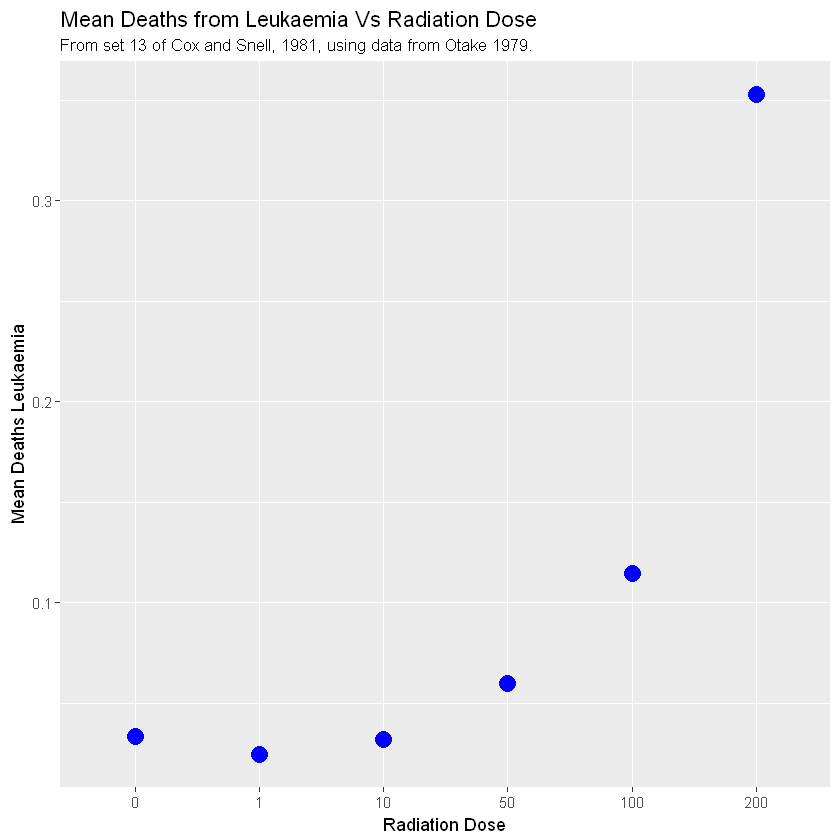

In [6]:
ggplot(data=data, aes(factor(dose), death, group=dose, size=4)) +
    stat_summary(fun.y="mean", geom="point", color="blue") +
    labs(x="Radiation Dose", y="Mean Deaths Leukaemia", title="Mean Deaths from Leukaemia Vs Radiation Dose", 
         color="Radiation\nDose", subtitle="From set 13 of Cox and Snell, 1981, using data from Otake 1979.") +
    theme(legend.position = "none")

In [285]:
glm_logit = glm(death ~ dose, data=data, family=binomial(link=logit))
summary(glm_logit)


Call:
glm(formula = death ~ dose, family = binomial(link = logit), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9328  -0.2633  -0.2470  -0.2453   2.6529  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.488973   0.204062 -17.098  < 2e-16 ***
dose         0.014410   0.001817   7.932 2.15e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 373.46  on 887  degrees of freedom
Residual deviance: 319.54  on 886  degrees of freedom
AIC: 323.54

Number of Fisher Scoring iterations: 6


### Testing null model against the full model using chi-squared test for difference in deviance.
### Conclusion: Full is model is definitely better than the null model

In [286]:
anova(glm_logit, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,887,373.4633,NA
dose,1,53.91883,886,319.5445,2.089456e-13


In [296]:
hl_test = hoslem.test(data$death, fitted(glm_logit), g=4)
tab = data.frame(Interval = rownames(hl_test$observed), 
           Observed_NoDeath = hl_test$observed[,1], 
           Expected_NoDeath = hl_test$expected[,1],
           Observed_Death = hl_test$observed[,2],
           Expected_Death = hl_test$expected[,2])
tab
hl_test

,Interval,Observed_NoDeath,Expected_NoDeath,Observed_Death,Expected_Death
"[0.0296,0.03]","[0.0296,0.03]",578,578.2564,18,17.743567
"(0.03,0.0341]","(0.03,0.0341]",151,150.6861,5,5.313911
"(0.0341,0.353]","(0.0341,0.353]",111,111.0575,25,24.942522



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  data$death, fitted(glm_logit)
X-squared = 0.02318, df = 2, p-value = 0.9885


### The chi-squared p-value for the Hosmer Lemeshow Goodness of Fit test is 1, indicating a good fit. So, the current model is adequate to model Radiation dose to people dying from Leukaemia.

## Final Model: log( pi / (1 - pi) ) = -3.489 + 0.014 * dose
### The coefficient for dose represents about 1.4% increase in the log odds of dying with 1 unit increase in radiation. In this case the odds are also the same because; exp(0.01441) = 1.0145

## _______________________
## Exercise 8.3

In [308]:
sesL = data.frame(ses = rep("L", 430+321+230+169),
                 iq = c(rep("L", 430), rep("LM", 321), rep("UM", 230), rep("H", 169)),
                 college_plans = c(rep(1, 17), rep(0, 413), rep(1, 42), rep(0,279), rep(1,50), rep(0, 180), rep(1,59),rep(0,110)))

sesLM = data.frame(ses = rep("LM", 345+367+312+274),
                 iq = c(rep("L", 345), rep("LM", 367), rep("UM", 312), rep("H", 274)),
                 college_plans = c(rep(1, 29), rep(0, 316), rep(1, 71), rep(0,296), rep(1,105), rep(0, 207), rep(1,136),rep(0,138)))

sesUM = data.frame(ses = rep("UM", 312+310+357+319),
                 iq = c(rep("L", 312), rep("LM", 310), rep("UM", 357), rep("H", 319)),
                 college_plans = c(rep(1, 55), rep(0, 257), rep(1, 80), rep(0,230), rep(1,165), rep(0, 192), rep(1,204),rep(0,115)))

sesH = data.frame(ses = rep("H", 148+265+339+493),
                 iq = c(rep("L", 148), rep("LM", 265), rep("UM", 339), rep("H", 493)),
                 college_plans = c(rep(1, 43), rep(0, 105), rep(1, 128), rep(0,137), rep(1,233), rep(0, 106), rep(1,422),rep(0,71)))

data = rbind(sesL, sesLM, sesUM, sesH)

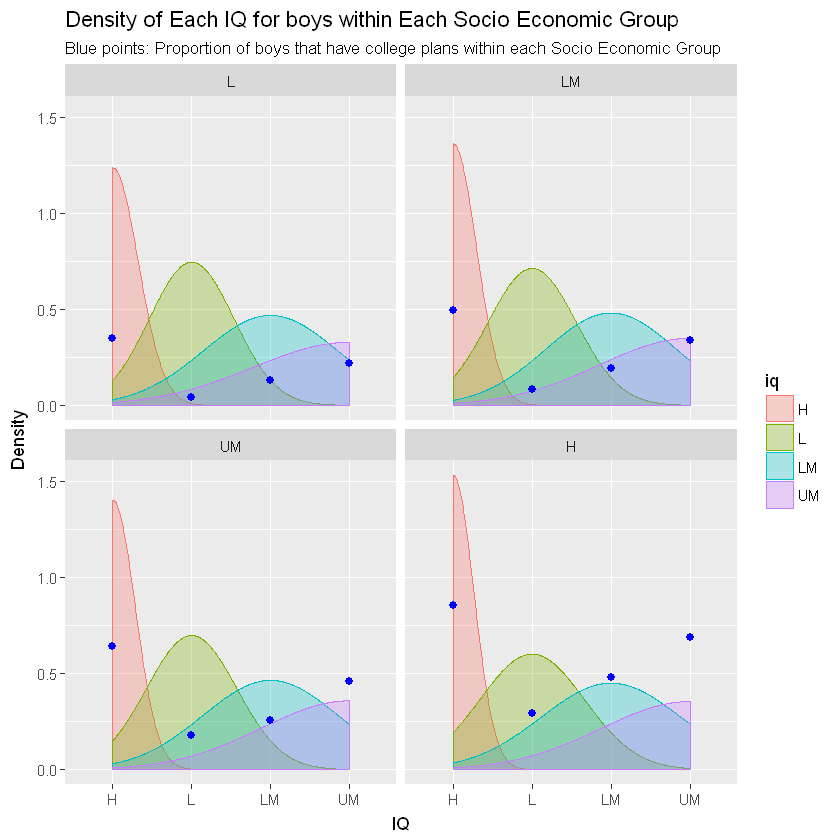

In [309]:
ggplot(data, aes(iq)) +
    geom_density(aes(colour=iq, fill=iq), alpha=0.3) +    
    #geom_bar(stat='density') +
    stat_summary(data=data, aes(iq, college_plans), fun.y = "mean", geom="point", size=2, colour="blue") +
    facet_wrap(~ses) +
    labs(x="IQ", y="Density", title="Density of Each IQ for boys within Each Socio Economic Group",
        subtitle="Blue points: Proportion of boys that have college plans within each Socio Economic Group") 

In [301]:
college_glm = glm(college_plans ~ ses + iq, data=data, family=binomial(link=logit))

In [302]:
summary(college_glm)


Call:
glm(formula = college_plans ~ ses + iq, family = binomial(link = logit), 
    data = data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8877  -0.8068  -0.4312   0.8516   2.4406  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -2.9260     0.1208 -24.215  < 2e-16 ***
ses11         0.5972     0.1108   5.390 7.03e-08 ***
ses12         1.1553     0.1074  10.757  < 2e-16 ***
ses13         2.1332     0.1092  19.543  < 2e-16 ***
iq2           0.8152     0.1144   7.126 1.03e-12 ***
iq3           1.6204     0.1101  14.715  < 2e-16 ***
iq4           2.3903     0.1114  21.456  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 6569.5  on 4990  degrees of freedom
Residual deviance: 5127.7  on 4984  degrees of freedom
AIC: 5141.7

Number of Fisher Scoring iterations: 4


### Testing null model against the full model using chi-squared test for difference in deviance.
### Conclusion: Full is model is definitely better than the null model

In [303]:
anova(college_glm, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,4990,6569.481,NA
ses,3,793.5548,4987,5775.926,1.081515e-171
iq,3,648.2023,4984,5127.724,3.573764e-140


In [304]:
hl_test = hoslem.test(data$college_plans, fitted(college_glm), g=10)
tab = data.frame(Interval = rownames(hl_test$observed), 
           Observed_NoCollege = hl_test$observed[,1], 
           Expected_NoCollege = hl_test$expected[,1],
           Observed_College = hl_test$observed[,2],
           Expected_College = hl_test$expected[,2])
tab
hl_test

,Interval,Observed_NoCollege,Expected_NoCollege,Observed_College,Expected_College
"[0.0509,0.0888]","[0.0509,0.0888]",729,722.49454,46,52.50546
"(0.0888,0.108]","(0.0888,0.108]",279,286.31408,42,34.68592
"(0.108,0.18]","(0.108,0.18]",553,567.40398,126,111.59602
"(0.18,0.213]","(0.18,0.213]",180,180.95727,50,49.04273
"(0.213,0.33]","(0.213,0.33]",542,534.82340,228,235.17660
"(0.33,0.463]","(0.33,0.463]",302,298.49451,224,227.50549
"(0.463,0.506]","(0.463,0.506]",137,131.01416,128,133.98584
"(0.506,0.65]","(0.506,0.65]",253,244.40034,340,348.59966
"(0.65,0.696]","(0.65,0.696]",106,103.10669,233,235.89331
"(0.696,0.832]","(0.696,0.832]",71,82.99102,422,410.00898



	Hosmer and Lemeshow goodness of fit (GOF) test

data:  data$college_plans, fitted(college_glm)
X-squared = 8.5083, df = 8, p-value = 0.3855


### The chi-squared p-value for the Hosmer Lemeshow Goodness of Fit test is 0.3855, indicating a good fit. So, the current model is adequate to model College Planse for schoolboys from Wisconsin.
## Final Model:
### log(pi / (1 - pi)) = -0.54 + 0.60 * *sesLM + 1.16 * *sesUM + 2.13 * *sesH - 2.39 * *iqL - 1.58 * *iqLM - 0.77 * *iqUM
# Inference
## Socio-Economic Status:
### L: Provided other variables are held constant, the odds of a Wisconsin schoolboy from Low socio-economic status making college plans decrease by 41%.
### LM: As the economic Status changes to Lower Middle and other variables are held constant, the odds of a Wisconsin schoolboy making college plans increases by 82 %.
### UM: As the economic Status changes to Upper Middle and other variables are held constant, the odds of a Wisconsin schoolboy making college plans increases by 218 %.
### H: As the economic Status changes  to High and other variables are held constant, the odds of a Wisconsin schoolboy making college plans increases by 741 %.
## IQ (irrespective of the socio-economic status)
### L: Provided other variables are held constant, the odds of a Wisconsin schoolboy with Low IQ score making college plans are about 9%
### LM: As the IQ score changes from Low to Lower Middle and other variables are held constant, the odds of a wisconsin schoolboy making college plans are about 21%
### UM: As the IQ score changes from Lower Middle to Upper Middle and other variables are held constant, the odds of a wisconsin schoolboy making college plans are about 46%
### H: As the IQ score changes from Upper Middle to High and other variables are held constant, the odds of a wisconsin schoolboy making college plans are about 58%
## Comments:
### The socio-economic status and college plans seem to be positively related, and the increase in a student making college plans is steep as the socio-economic status changes. When the increase is compared to IQ scores, the increase is not as steep.
### So, based on this data, college preparedness of schoolboys of Wisconsin in 1968 changed significantly with increase in socio-economic status.
### NOTE: Model with interaction of socio-economic and IQ was not significantly different than the current model. Here the socio-economic status and IQ levels were considered "nominal."

## ______________________________________________________________________________
## Exercise 8.5

In [275]:
control = data.frame(Trt = c("C","C","C"), Centrifuge = c(40,150,350), Anthers =c(55,52,57), Total = c(102,99,108))
treatment = data.frame(Trt = c("T", "T", "T"), Centrifuge = c(40,150,350), Anthers =c(55,50,50), Total = c(76,81,90))
data = rbind(control, treatment)
data$proportion = data$Anthers / data$Total
data

Trt,Centrifuge,Anthers,Total,proportion
C,40,55,102,0.5392157
C,150,52,99,0.5252525
C,350,57,108,0.5277778
T,40,55,76,0.7236842
T,150,50,81,0.6172840
T,350,50,90,0.5555556


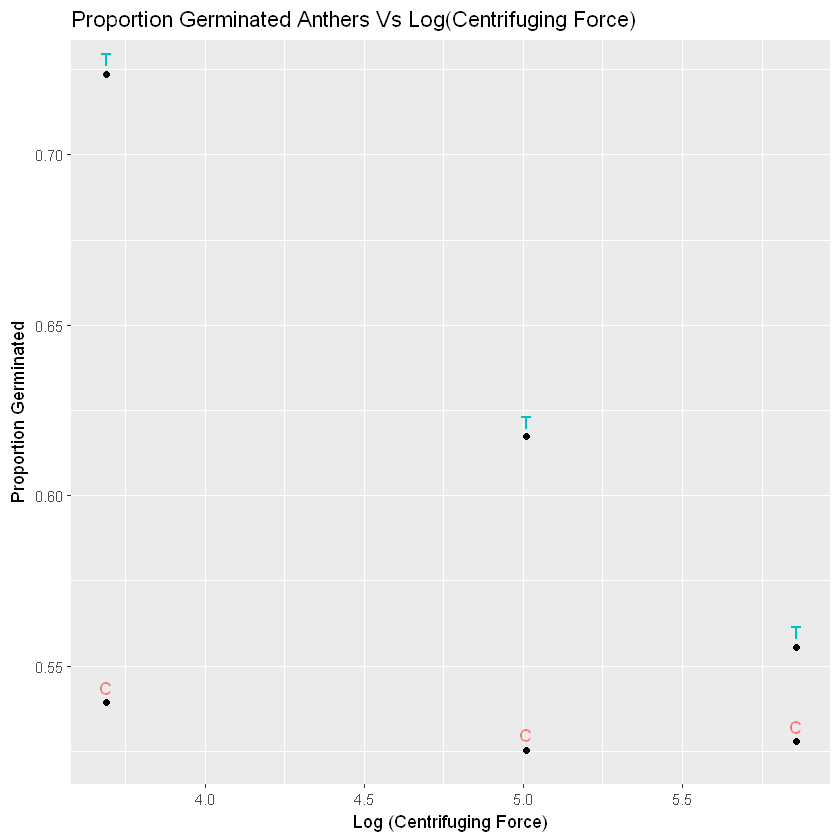

In [276]:
ggplot(data=data, aes(log(Centrifuge), proportion)) +
    geom_point(aes(group=Trt)) +
    geom_text(aes(label=Trt, colour=Trt), vjust=-.6) +
    labs(x="Log (Centrifuging Force)", y="Proportion Germinated", 
         title = "Proportion Germinated Anthers Vs Log(Centrifuging Force)") +
    theme(legend.position = "none")

### Fitting a linear model with different intercepts and same slope

In [277]:
msreg = lm(proportion ~ Trt + log(Centrifuge), data=data)
summary(msreg)


Call:
lm(formula = proportion ~ Trt + log(Centrifuge), data = data)

Residuals:
        1         2         3         4         5         6 
-0.040119  0.001108  0.039012  0.042924 -0.008287 -0.034637 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)   
(Intercept)      0.73336    0.10462   7.010  0.00596 **
TrtT             0.10143    0.03725   2.723  0.07237 . 
log(Centrifuge) -0.04175    0.02087  -2.001  0.13918   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.04562 on 3 degrees of freedom
Multiple R-squared:  0.7919,	Adjusted R-squared:  0.6532 
F-statistic: 5.709 on 2 and 3 DF,  p-value: 0.0949


### Estimated parameters from "lm" method in R vs Estimates from Book

In [278]:
coef = data.frame(R_lm = round(coefficients(msreg),4), Book_Estimates = c(0.877,0.0407,-0.155))
coef

,R_lm,Book_Estimates
(Intercept),0.7334,0.8770
TrtT,0.1014,0.0407
log(Centrifuge),-0.0418,-0.1550


### Fitted Values from "lm" method in R vs Book

In [279]:
fit = data.frame(Observed = round(data$proportion, 3),
                 R_lm_fitted = round(fitted(msreg), 3), 
                 Book_Fitted_Model = c(0.576,0.526,0.493,0.671,0.625,0.593))
fit

Observed,R_lm_fitted,Book_Fitted_Model
0.539,0.579,0.576
0.525,0.524,0.526
0.528,0.489,0.493
0.724,0.681,0.671
0.617,0.626,0.625
0.556,0.590,0.593


### Log Likelihood Ratio Statistic

In [280]:
x_sq_mod = sum((data$proportion - fitted(msreg))^2/((data$proportion * (1 - data$proportion))/data$Total))
data.frame(Modified_x_sq = round(x_sq_mod,3), Book_D = 2.619, d.f = 3)

Modified_x_sq,Book_D,d.f
2.482,2.619,3


## Comments:
### There exists major differences between parameter estimates from the book vs current implementation, although signs of all parameter estimates are the same. I believe these differences may be explained by the machine and methods that the were used to perform regression. (Book 1990, Current 2017)
### Fitted values are very close between the book and current implementation, even though parameter estimates are vastly different.
### For unbalanced design of this experiment, the modified chi-squared statistic should be used because it takes into account, relative frequencies and thus may represent an adequate approximation to the  central chi-squared distribution with N - p degrees of freedom.